In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
R  = 0.037  #metros
m  = 0.145  #kilogramos
g = 9.8     #m/s2
Cd = 0.37
rho = 1.225 #kg/m3
Air = 0    #0 para No resistencia; 1 para resistencia

In [3]:
def Accel(r,v):
    if Air == 0:
        Ffx = 0.
        Ffy = 0.
    else:
        Ffx = -0.5*Cd*rho*np.pi*R**2.*np.sqrt(v.dot(v))*v[0]/m
        Ffy = -0.5*Cd*rho*np.pi*R**2.*np.sqrt(v.dot(v))*v[1]/m
    a = np.array([Ffx,Ffy-g])
    return a
def Euler(r0,v0,dt):
    v = v0 + Accel(r0,v0)*dt
    r = r0 + v0 * dt
    return r,v

def EulerCromer(r0,v0,dt):
    v = v0 + Accel(r0,v0)*dt
    r = r0 + v * dt
    return r,v

def PuntoMed(r0,v0,dt):
    v = v0 + Accel(r0,v0)*dt
    r = r0 + 0.5*(v+v0)*dt
    return r,v

# 1. Pelota a 15 m/s  a $45^\circ$

In [4]:
#Condiciones Iniciales
V0 = 15.   #m/s
Deg = 45.  #grados
h = 0.     #Altura inicial
t0 = 0.

In [5]:
rad = np.radians(Deg) #conversión a radianes
Vel = np.array([V0*np.cos(rad),V0*np.sin(rad)])
Pos = np.array([0.,h])

In [6]:
#Valores Teoricos
Xmax = V0**2.*np.sin(2.*rad)/g
Ymax = V0**2.*np.sin(rad)**2./(2.*g)
Tfly = 2.*V0*np.sin(rad)/g
print(Xmax,Ymax,Tfly)

22.9591836735 5.73979591837 2.16461259547


In [7]:
time = np.linspace(0,Tfly,1000)
Xteo = Vel[0]*time
Yteo = h+Vel[1]*time-0.5*g*time**2.

# 1.1.a Método de Euler a dt = 0.1

In [8]:
#Calculo numérico Método de Euler
dt = 0.1
PosX,PosY = [Pos[0]],[Pos[1]]
VelX,VelY = [Vel[0]],[Vel[1]]
T = [t0]
while Pos[1]>=0:
    Pos,Vel = Euler(Pos,Vel,dt)
    t0 += dt
    PosX.append(Pos[0]),PosY.append(Pos[1])
    VelX.append(Vel[0]),VelY.append(Vel[1])
    T.append(t0)

Errores

In [9]:
print('Error en Xmax:',100.*abs(Xmax-max(PosX))/Xmax)
print('Error en Ymax:',100.*abs(Ymax-max(PosY))/Ymax)
print('Error en Tvuelo:',100.*abs(Tfly-max(T))/Tfly)

Error en Xmax: 6.2545789863
Error en Ymax: 9.36385158732
Error en Tvuelo: 6.2545789863


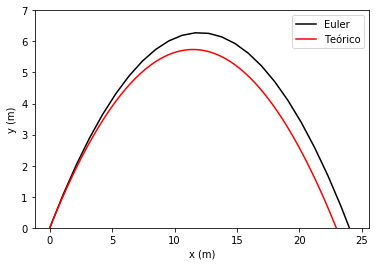

In [10]:
plt.plot(PosX,PosY,'k',label='Euler')
plt.plot(Xteo,Yteo,'r',label='Teórico')
plt.ylim(0,7)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

# 1.1.b Método de Euler a dt = 0.01

Error en Xmax: 0.710861821796
Error en Ymax: 0.925467643592
Error en Tvuelo: 0.710861821796


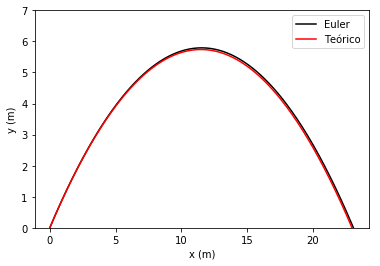

In [11]:
dt = 0.01
t0 = 0.
Vel = np.array([V0*np.cos(rad),V0*np.sin(rad)])
Pos = np.array([0.,h])
PosX,PosY = [Pos[0]],[Pos[1]]
VelX,VelY = [Vel[0]],[Vel[1]]
T = [t0]
while Pos[1]>=0:
    Pos,Vel = Euler(Pos,Vel,dt)
    t0 += dt
    PosX.append(Pos[0]),PosY.append(Pos[1])
    VelX.append(Vel[0]),VelY.append(Vel[1])
    T.append(t0)
print('Error en Xmax:',100.*abs(Xmax-max(PosX))/Xmax)
print('Error en Ymax:',100.*abs(Ymax-max(PosY))/Ymax)
print('Error en Tvuelo:',100.*abs(Tfly-max(T))/Tfly)
plt.plot(PosX,PosY,'k',label='Euler')
plt.plot(Xteo,Yteo,'r',label='Teórico')
plt.ylim(0,7)
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

# 1.2 Euler-Cromer

In [12]:
t0 = 0.
Vel = np.array([V0*np.cos(rad),V0*np.sin(rad)])
Pos = np.array([0.,h])
PosX,PosY = [Pos[0]],[Pos[1]]
VelX,VelY = [Vel[0]],[Vel[1]]
T = [t0]
while Pos[1]>=0:
    Pos,Vel = EulerCromer(Pos,Vel,dt)
    t0 += dt
    PosX.append(Pos[0]),PosY.append(Pos[1])
    VelX.append(Vel[0]),VelY.append(Vel[1])
    T.append(t0)
print('Error en Xmax:',100.*abs(Xmax-max(PosX))/Xmax)
print('Error en Ymax:',100.*abs(Ymax-max(PosY))/Ymax)
print('Error en Tvuelo:',100.*abs(Tfly-max(T))/Tfly)

Error en Xmax: 0.213091038954
Error en Ymax: 0.922438077909
Error en Tvuelo: 0.213091038954


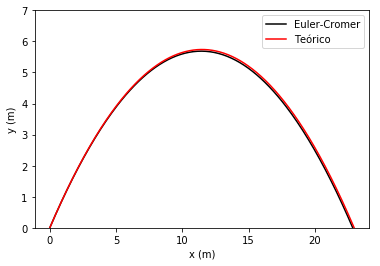

In [13]:
plt.plot(PosX,PosY,'k',label='Euler-Cromer')
plt.plot(Xteo,Yteo,'r',label='Teórico')
plt.ylim(0,7)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

# 1.3 Punto Medio

In [14]:
t0=0.
Vel = np.array([V0*np.cos(rad),V0*np.sin(rad)])
Pos = np.array([0.,h])
PosX,PosY = [Pos[0]],[Pos[1]]
VelX,VelY = [Vel[0]],[Vel[1]]
T = [t0]
while Pos[1]>=0:
    PosX.append(Pos[0]),PosY.append(Pos[1])
    VelX.append(Vel[0]),VelY.append(Vel[1])
    T.append(t0)
    Pos,Vel = PuntoMed(Pos,Vel,dt)
    t0 += dt
print('Error en Xmax:',100.*abs(Xmax-max(PosX))/Xmax)
print('Error en Ymax:',100.*abs(Ymax-max(PosY))/Ymax)
print('Error en Tvuelo:',100.*abs(Tfly-max(T))/Tfly)

Error en Xmax: 0.213091038954
Error en Ymax: 0.000454077909067
Error en Tvuelo: 0.213091038954


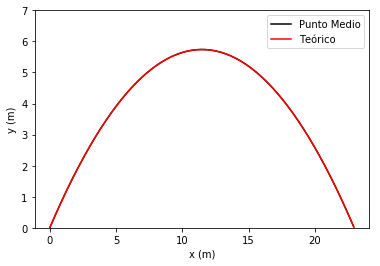

In [15]:
plt.plot(PosX,PosY,'k',label='Punto Medio')
plt.plot(Xteo,Yteo,'r',label='Teórico')
plt.ylim(0,7)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

# 2. Resistencia al Aire

In [16]:
Air = 1.
V0 = 50.   #m/s
Deg = 45.  #grados
h = 0.     #Altura inicial
t0 = 0.
dt=0.01

In [17]:
Tfly = 2.*V0*np.sin(rad)/g
time = np.linspace(0,Tfly,1000)
Vel = np.array([V0*np.cos(rad),V0*np.sin(rad)])
Pos = np.array([0.,h])
Xteo = Vel[0]*time
Yteo = h+Vel[1]*time-0.5*g*time**2.

In [18]:
PosX,PosY = [Pos[0]],[Pos[1]]
VelX,VelY = [Vel[0]],[Vel[1]]
T = [t0]
while Pos[1]>=0:
    PosX.append(Pos[0]),PosY.append(Pos[1])
    VelX.append(Vel[0]),VelY.append(Vel[1])
    T.append(t0)
    Pos,Vel = PuntoMed(Pos,Vel,dt)
    t0 += dt

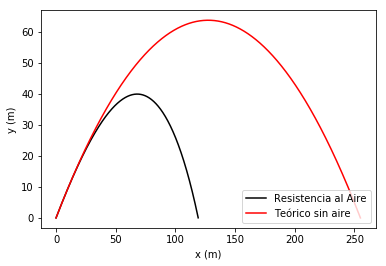

In [19]:
plt.plot(PosX,PosY,'k',label='Resistencia al Aire')
plt.plot(Xteo,Yteo,'r',label='Teórico sin aire')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()